# Exploratory Data Analysis

In [5]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import TimeSeriesSplit

### Gold Data

Quandl is a great site (https://www.quandl.com/) with a great selection of free (and premium) financial databases that are easy to access and use. 

In [2]:
import quandl
data = quandl.get("LBMA/GOLD", authtoken="NONE", start_date="2017-02-25")
data = data.iloc[::-1]

# I removed my authtoken here so this will break. You can get your own at quandl.

In [3]:
data.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2018-10-18,1224.60,1223.00,933.76,934.01,1062.83,1064.13
2018-10-17,1226.75,1229.05,933.68,935.80,1061.38,1065.09
2018-10-16,1228.85,1230.70,931.35,930.90,1061.73,1060.99
2018-10-15,1233.00,1229.95,937.70,936.36,1064.45,1061.57
2018-10-12,1218.75,1219.75,922.11,925.30,1052.15,1056.55


### Google Trends Data
This data was pulled using API calls in another notebook and persisted to these csvs

In [6]:
trend_data = pd.read_csv('data/google_trends_data_eth.csv')
trend_data_2 = pd.read_csv('data/google_trends_data_btc.csv')
trend_data_combo = trend_data.merge(trend_data_2)
trend_data_combo = trend_data_combo.drop(columns = ['isPartial', 'buy ethereum'])

In [224]:
trend_data_combo.set_index(trend_data_combo.date, drop = True, inplace = True)
trend_data_combo.head(3)

,Ethereum,eth,bitcoin,blockchain,btc,crypto,cryptocurrency
date,,,,,,,
2017-02-26 00:00:00,4,3,62,6,50,17,4
2017-02-26 01:00:00,4,3,62,5,55,15,4
2017-02-26 02:00:00,4,3,61,6,55,15,4


In [38]:
trend_data_combo.dtypes

date              object
Ethereum           int64
eth                int64
bitcoin            int64
blockchain         int64
btc                int64
crypto             int64
cryptocurrency     int64
dtype: object

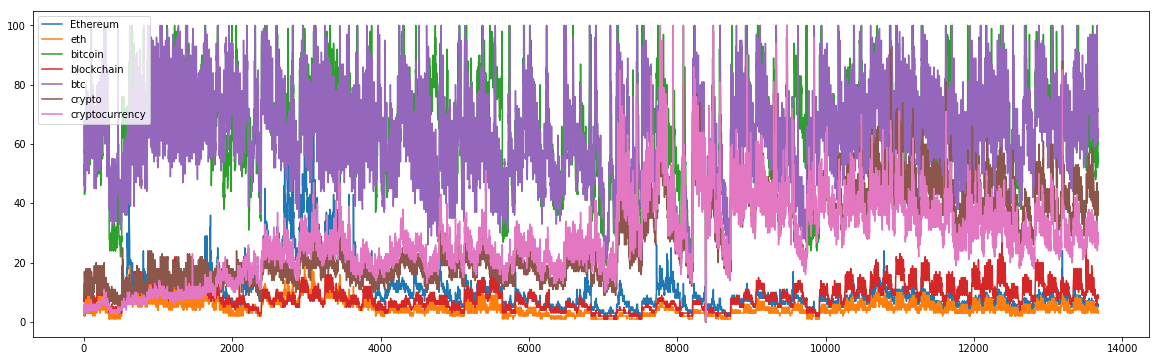

In [42]:
trend_data_combo.plot(figsize = (20,6))
plt.show()

In [54]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117e9ef60>,
      dtype=object)

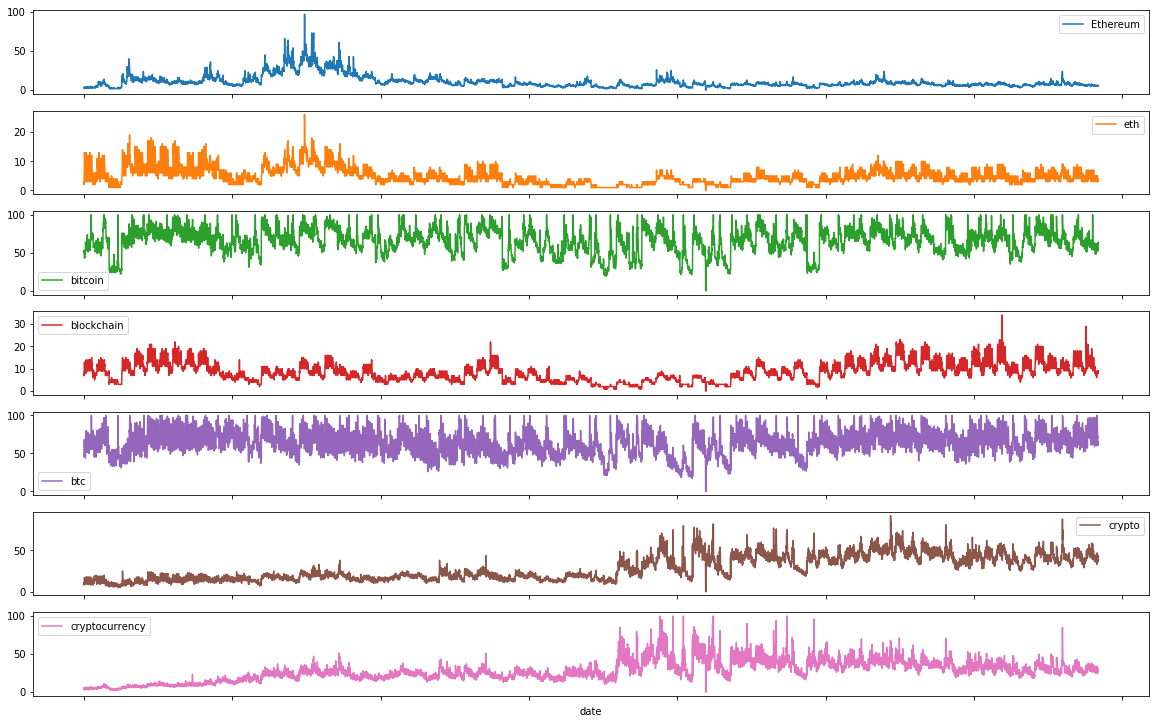

In [58]:
trend_data_combo.plot(subplots=True, figsize = [20, 14])

In [1]:
# trend_data_combo.plot(kind = 'scatter', x = trend_data_combo.index, y = trend_data_combo.columns)

In [61]:
trend_data_combo.describe()

,Ethereum,eth,bitcoin,blockchain,btc,crypto,cryptocurrency
count,13678.000000,13678.000000,13678.000000,13678.000000,13678.000000,13678.000000,13678.000000
mean,10.534727,4.833309,65.313715,8.568650,63.169469,28.086562,27.647024
std,7.864480,2.722741,16.300899,4.094081,15.719430,14.613931,13.679923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,56.000000,5.000000,53.000000,16.000000,19.000000
50%,8.000000,4.000000,67.000000,8.000000,63.000000,22.000000,26.000000
75%,12.000000,6.000000,77.000000,11.000000,74.000000,41.000000,35.000000
max,97.000000,26.000000,100.000000,34.000000,100.000000,92.000000,100.000000


### Crypto Price Data

Building complete dataset - Daily

In [299]:
import pandas as pd

In [300]:
eth_price_data = pd.read_csv('data/eth_hourly_data.csv')
btc_price_data = pd.read_csv('data/btc_hourly_data.csv')
eth_trend_data = pd.read_csv('data/google_trends_data_eth.csv')
btc_trend_data = pd.read_csv('data/google_trends_data_btc.csv')

In [301]:
print(eth_price_data.shape)
print(btc_price_data.shape)
print(eth_trend_data.shape)
print(btc_trend_data.shape)

(14425, 7)
(14450, 7)
(13520, 7)
(13520, 5)


In [302]:
eth_price_data = pd.read_csv('eth_hourly_data.csv')
eth_price_data.drop_duplicates(inplace=True)
eth_price_data.reset_index(inplace=True, drop=True)
eth_price_data['time'] = eth_price_data['time'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
eth_price_data.drop(eth_price_data.index[:575], inplace=True)
eth_price_data.reset_index(inplace=True, drop=True)
eth_price_data.drop(eth_price_data.index[13249:], inplace=True)
eth_price_data = eth_price_data[::-1]
eth_price_data.reset_index(inplace=True, drop=True)
eth_price_data.tail(10)

,time,close,high,low,open,volumefrom,volumeto
13239,2018-08-31 15:00:00,277.42,279.03,277.01,277.04,10716.27,2981849.06
13240,2018-08-31 16:00:00,280.38,281.57,277.35,277.42,17648.88,4940600.17
13241,2018-08-31 17:00:00,283.16,284.10,279.71,280.38,24879.76,7021512.47
13242,2018-08-31 18:00:00,283.02,284.55,281.62,283.16,15214.66,4309640.73
13243,2018-08-31 19:00:00,283.29,284.01,282.59,283.03,8326.23,2359971.10
13244,2018-08-31 20:00:00,283.33,284.72,283.18,283.29,10591.64,3004708.96
13245,2018-08-31 21:00:00,282.38,283.33,281.53,283.33,7356.64,2078197.29
13246,2018-08-31 22:00:00,282.05,282.40,281.60,282.38,4438.71,1252563.86
13247,2018-08-31 23:00:00,281.66,282.95,281.20,282.05,4722.46,1332867.59
13248,2018-09-01 00:00:00,284.24,284.58,281.44,281.65,9949.12,2819749.31


In [303]:

btc_price_data = pd.read_csv('data/btc_hourly_data.csv')
btc_price_data.drop_duplicates(inplace=True)
btc_price_data.reset_index(inplace=True, drop=True)
btc_price_data['time'] = btc_price_data['time'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
btc_price_data.drop(btc_price_data.index[:577], inplace=True)
btc_price_data.drop(btc_price_data.index[13249:], inplace=True)
btc_price_data = btc_price_data[::-1]
btc_price_data.reset_index(inplace=True, drop=True)
btc_price_data.head(1)

,time,close,high,low,open,volumefrom,volumeto
0,2017-02-26 00:00:00,1149.56,1153.05,1146.47,1148.38,798.48,920235.89


In [304]:
btc_price_data.tail(1)

,time,close,high,low,open,volumefrom,volumeto
13248,2018-09-01 00:00:00,7054.94,7061.27,7025.58,7026.96,1063.4,7512855.53


In [305]:
eth_trend_data.drop_duplicates(inplace=True)
eth_trend_data.reset_index(inplace=True, drop=True)
btc_trend_data.drop_duplicates(inplace=True)
btc_trend_data.reset_index(inplace=True, drop=True)

trend_data_combo = eth_trend_data.merge(btc_trend_data)
trend_data_combo.drop_duplicates(inplace=True)
trend_data_combo.reset_index(inplace=True, drop=True)
trend_data_combo.drop(trend_data_combo.index[:144], inplace=True)
trend_data_combo.drop(trend_data_combo.index[13478:], inplace=True)
trend_data_combo.reset_index(inplace=True, drop=True)
trend_data_combo.drop(columns = ['isPartial', 'buy ethereum'], inplace=True)
trend_data_combo.drop_duplicates(subset='date', inplace=True)
trend_data_combo.rename(index=str, columns={"date": "time"}, inplace=True)

In [306]:
trend_data_combo.head(1)

,time,Ethereum,eth,bitcoin,blockchain,btc,crypto,cryptocurrency
0,2017-02-26 00:00:00,4,3,62,6,50,17,4


In [307]:
trend_data_combo.tail(1)

,time,Ethereum,eth,bitcoin,blockchain,btc,crypto,cryptocurrency
13477,2018-09-01 00:00:00,5,3,58,8,64,37,30


In [308]:
# full_data = eth_price_data.merge(btc_price_data, on = eth_price_data.index)
# full_data.head(3)

In [309]:
print(eth_price_data.shape)
print(btc_price_data.shape)
print(trend_data_combo.shape)

(13249, 7)
(13249, 7)
(13249, 8)


In [310]:
# eth_price_data['1-hour-change'] = eth_price_data['open'] - eth_price_data['close']

def hour_change(shift, dataframe, shift_on):
    shift_column_name = '{}-hour-{}-shift'.format(shift, shift_on)
    change_column_name = '{}-hour-{}-change'.format(shift, shift_on)
    
    dataframe[shift_column_name] = np.nan
    dataframe[shift_column_name] = dataframe[shift_on].shift(shift)
    
    dataframe.fillna(method='bfill', inplace=True)
    
    dataframe[change_column_name] = dataframe[shift_on] - dataframe[shift_column_name]
    dataframe.drop(columns=[shift_column_name], inplace=True)
    
    return dataframe
    

In [311]:
shifts = [1, 2, 3, 4, 6, 8, 10, 12]
for x in shifts:
    eth_data = hour_change(x, eth_price_data, 'close')

In [312]:
eth_data.tail(3)

,time,close,high,low,open,volumefrom,volumeto,1-hour-close-change,2-hour-close-change,3-hour-close-change,4-hour-close-change,6-hour-close-change,8-hour-close-change,10-hour-close-change,12-hour-close-change
13246,2018-08-31 22:00:00,282.05,282.40,281.60,282.38,4438.71,1252563.86,-0.33,-1.28,-1.24,-0.97,1.67,5.01,4.82,2.24
13247,2018-08-31 23:00:00,281.66,282.95,281.20,282.05,4722.46,1332867.59,-0.39,-0.72,-1.67,-1.63,-1.50,4.24,3.70,0.87
13248,2018-09-01 00:00:00,284.24,284.58,281.44,281.65,9949.12,2819749.31,2.58,2.19,1.86,0.91,1.22,3.86,7.20,7.01


In [313]:
eth_data['next_hour_change'] = np.nan
eth_data['next_hour_change'] = eth_data['1-hour-close-change'].shift(-1)
eth_data['sign_change'] = np.sign(eth_data.next_hour_change)

#need this or the last row will be NaN for these columns and mess everything else. 
eth_data.fillna(method='ffill', inplace=True)

#  (lambda row: label_race (row),axis=1)
eth_data.tail(3)

,time,close,high,low,open,volumefrom,volumeto,1-hour-close-change,2-hour-close-change,3-hour-close-change,4-hour-close-change,6-hour-close-change,8-hour-close-change,10-hour-close-change,12-hour-close-change,next_hour_change,sign_change
13246,2018-08-31 22:00:00,282.05,282.40,281.60,282.38,4438.71,1252563.86,-0.33,-1.28,-1.24,-0.97,1.67,5.01,4.82,2.24,-0.39,-1.0
13247,2018-08-31 23:00:00,281.66,282.95,281.20,282.05,4722.46,1332867.59,-0.39,-0.72,-1.67,-1.63,-1.50,4.24,3.70,0.87,2.58,1.0
13248,2018-09-01 00:00:00,284.24,284.58,281.44,281.65,9949.12,2819749.31,2.58,2.19,1.86,0.91,1.22,3.86,7.20,7.01,2.58,1.0


In [314]:
# for binary classification "no change" was changed from 0 to 1
# only run once! will break and convert everything to nan if you run twice 

eth_data['sign_change'] = eth_data.sign_change.astype('int32')
eth_data['sign_change'] = eth_data.sign_change.astype('str')
improve_sign_change = {'-1' : 0, '0': 1, '1': 1}
eth_data.sign_change = eth_data.sign_change.map(improve_sign_change)

In [315]:
#feature engineering
# convering high and low metrics into single "range" metric 
# scaling the volumeto data. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(np.array(eth_data['volumeto']).reshape(-1,1))
new_y = scaler.transform(np.array(eth_data['volumeto']).reshape(-1,1))
eth_data['volume'] = new_y

eth_data['range'] = eth_data['high'] - eth_data['low']

eth_data.drop(columns = ['close', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'next_hour_change'], inplace=True)

In [316]:
eth_data.head()

,time,1-hour-close-change,2-hour-close-change,3-hour-close-change,4-hour-close-change,6-hour-close-change,8-hour-close-change,10-hour-close-change,12-hour-close-change,sign_change,volume,range
0,2017-02-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.000502,0.13
1,2017-02-26 01:00:00,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0,0.000438,0.11
2,2017-02-26 02:00:00,-0.08,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,1,0.000392,0.12
3,2017-02-26 03:00:00,0.08,0.00,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,1,0.000209,0.14
4,2017-02-26 04:00:00,0.11,0.19,0.11,0.07,0.07,0.07,0.07,0.07,1,0.000206,0.15


In [317]:
shifts = [1, 2, 3, 4, 6, 8, 10, 12]
for x in shifts:
    btc_data = hour_change(x, btc_price_data, 'close')

#need this or the last row will be NaN for these columns and mess everything else. 
btc_data.fillna(method='ffill', inplace=True)

#feature engineering
# convering high and low metrics into single "range" metric 
# scaling the volumeto data. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(np.array(btc_data['volumeto']).reshape(-1,1))
new_y = scaler.transform(np.array(btc_data['volumeto']).reshape(-1,1))
btc_data['volume'] = new_y

btc_data['range'] = btc_data['high'] - btc_data['low']

btc_data.drop(columns = ['close', 'high', 'low', 'open', 'volumefrom', 'volumeto'], inplace=True)

In [318]:
btc_data.head()

,time,1-hour-close-change,2-hour-close-change,3-hour-close-change,4-hour-close-change,6-hour-close-change,8-hour-close-change,10-hour-close-change,12-hour-close-change,volume,range
0,2017-02-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.001547,6.58
1,2017-02-26 01:00:00,-13.83,-13.83,-13.83,-13.83,-13.83,-13.83,-13.83,-13.83,0.006300,17.22
2,2017-02-26 02:00:00,4.58,-9.25,-9.25,-9.25,-9.25,-9.25,-9.25,-9.25,0.002912,11.24
3,2017-02-26 03:00:00,-2.41,2.17,-11.66,-11.66,-11.66,-11.66,-11.66,-11.66,0.002053,8.34
4,2017-02-26 04:00:00,12.70,10.29,14.87,1.04,1.04,1.04,1.04,1.04,0.002081,12.48


In [343]:
full_data = eth_data.merge(btc_data, on = 'time', suffixes = ('-eth', '-btc'))

In [344]:
full_data.head(3)

,time,1-hour-close-change-eth,2-hour-close-change-eth,3-hour-close-change-eth,4-hour-close-change-eth,6-hour-close-change-eth,8-hour-close-change-eth,10-hour-close-change-eth,12-hour-close-change-eth,sign_change,...,1-hour-close-change-btc,2-hour-close-change-btc,3-hour-close-change-btc,4-hour-close-change-btc,6-hour-close-change-btc,8-hour-close-change-btc,10-hour-close-change-btc,12-hour-close-change-btc,volume-btc,range-btc
0,2017-02-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.001547,6.58
1,2017-02-26 01:00:00,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0,...,-13.83,-13.83,-13.83,-13.83,-13.83,-13.83,-13.83,-13.83,0.006300,17.22
2,2017-02-26 02:00:00,-0.08,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,1,...,4.58,-9.25,-9.25,-9.25,-9.25,-9.25,-9.25,-9.25,0.002912,11.24


In [345]:
full_data_with_trends = full_data.merge(trend_data_combo, on = 'time')

In [346]:
full_data_with_trends.head(1)

,time,1-hour-close-change-eth,2-hour-close-change-eth,3-hour-close-change-eth,4-hour-close-change-eth,6-hour-close-change-eth,8-hour-close-change-eth,10-hour-close-change-eth,12-hour-close-change-eth,sign_change,...,12-hour-close-change-btc,volume-btc,range-btc,Ethereum,eth,bitcoin,blockchain,btc,crypto,cryptocurrency
0,2017-02-26 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.001547,6.58,4,3,62,6,50,17,4


CAUTION THE FOLLOWING WILL OVERWRITE EXISTING FILES OF THE SAME NAME

In [347]:
full_data.to_csv('data/ml_class_data_ver1.csv', mode = "w+")
full_data_with_trends.to_csv('data/ml_class_data_with_trends_ver1.csv', mode = "w+")